### Práctica 19 Clustering Jerárquico

En esta práctica utilizamos el dataset de Iris. 

Los datos se normalizan, se aplica el clustering jerárquico y se genera el dendrograma y la evaluación con la métrica de Silhouette para cada uno de los siguientes metodos de enlace:

- Single-link.
- Complete-link.
- Ward.
- Average-link.
- Centroid-link. 

Se puede limitar el nivel de profundidad del dendrograma en un clustering jerárquico en Python usando el parámetro truncate_mode e indicando la profundidad con p=n.


Método de enlace: single


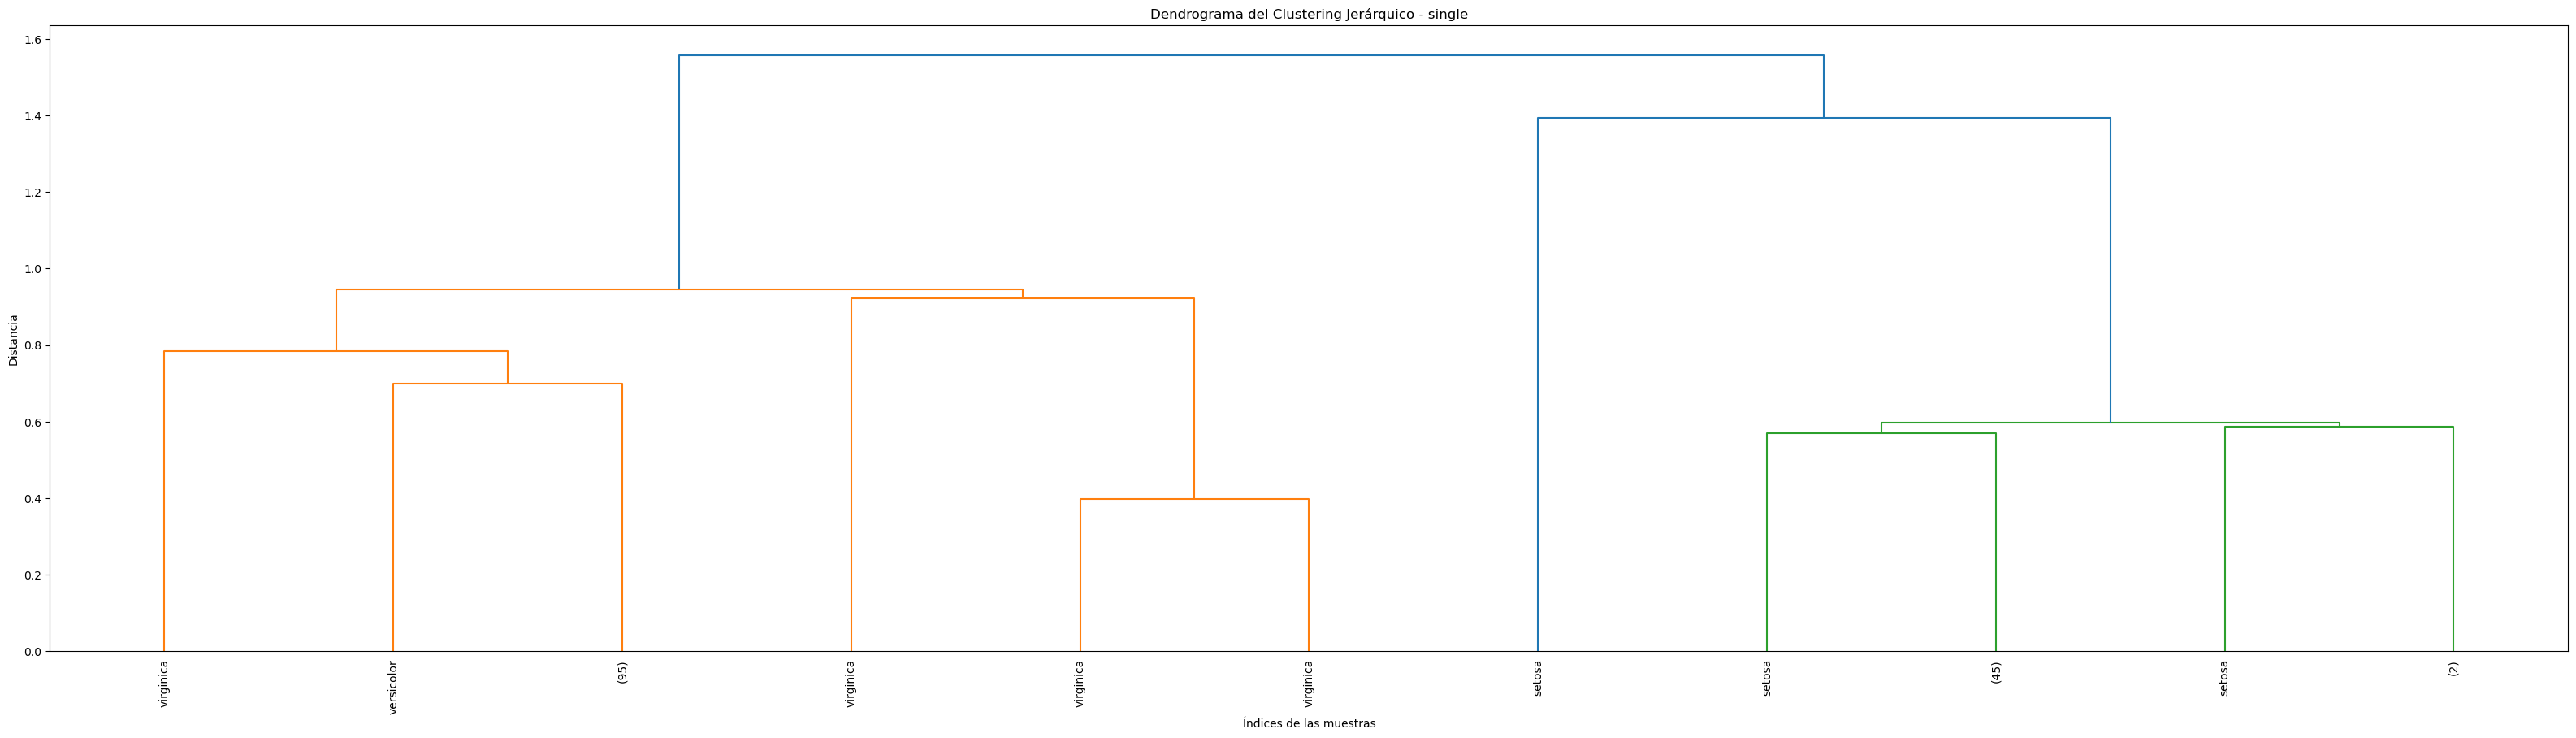

Puntaje de Silhouette: 0.5046

Método de enlace: complete


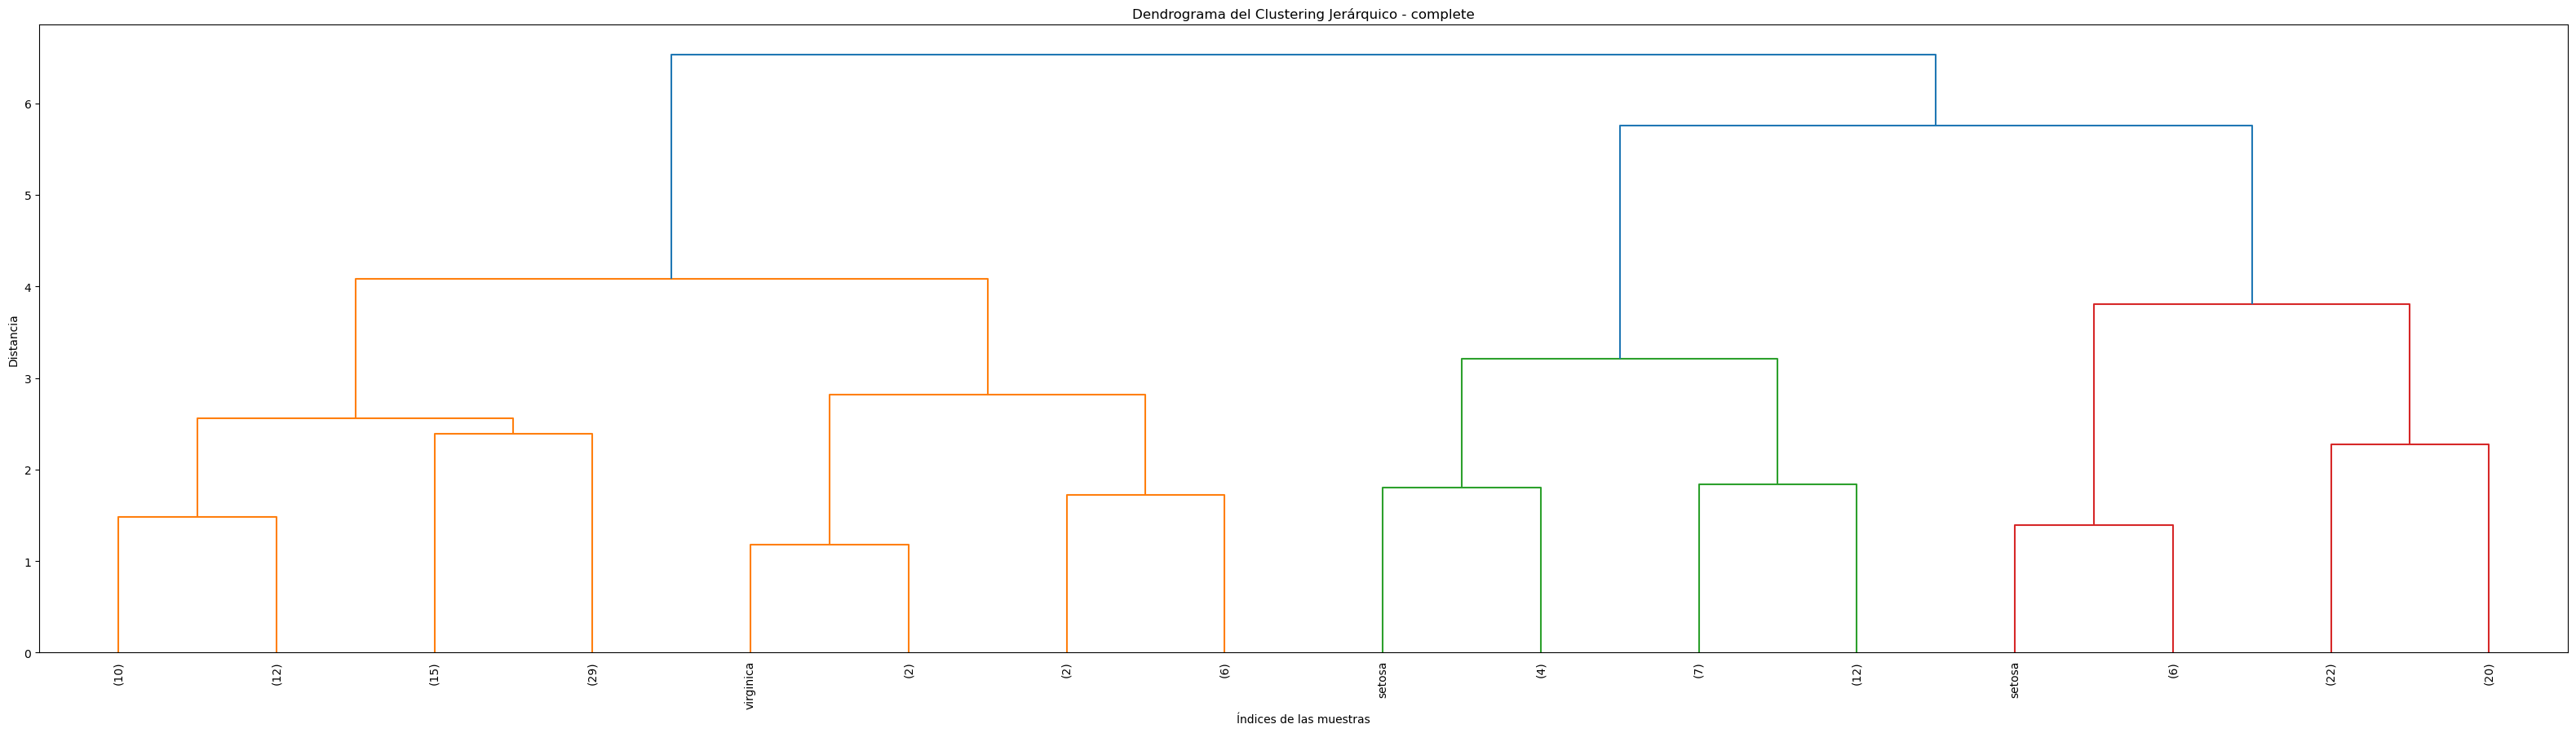

Puntaje de Silhouette: 0.4496

Método de enlace: ward


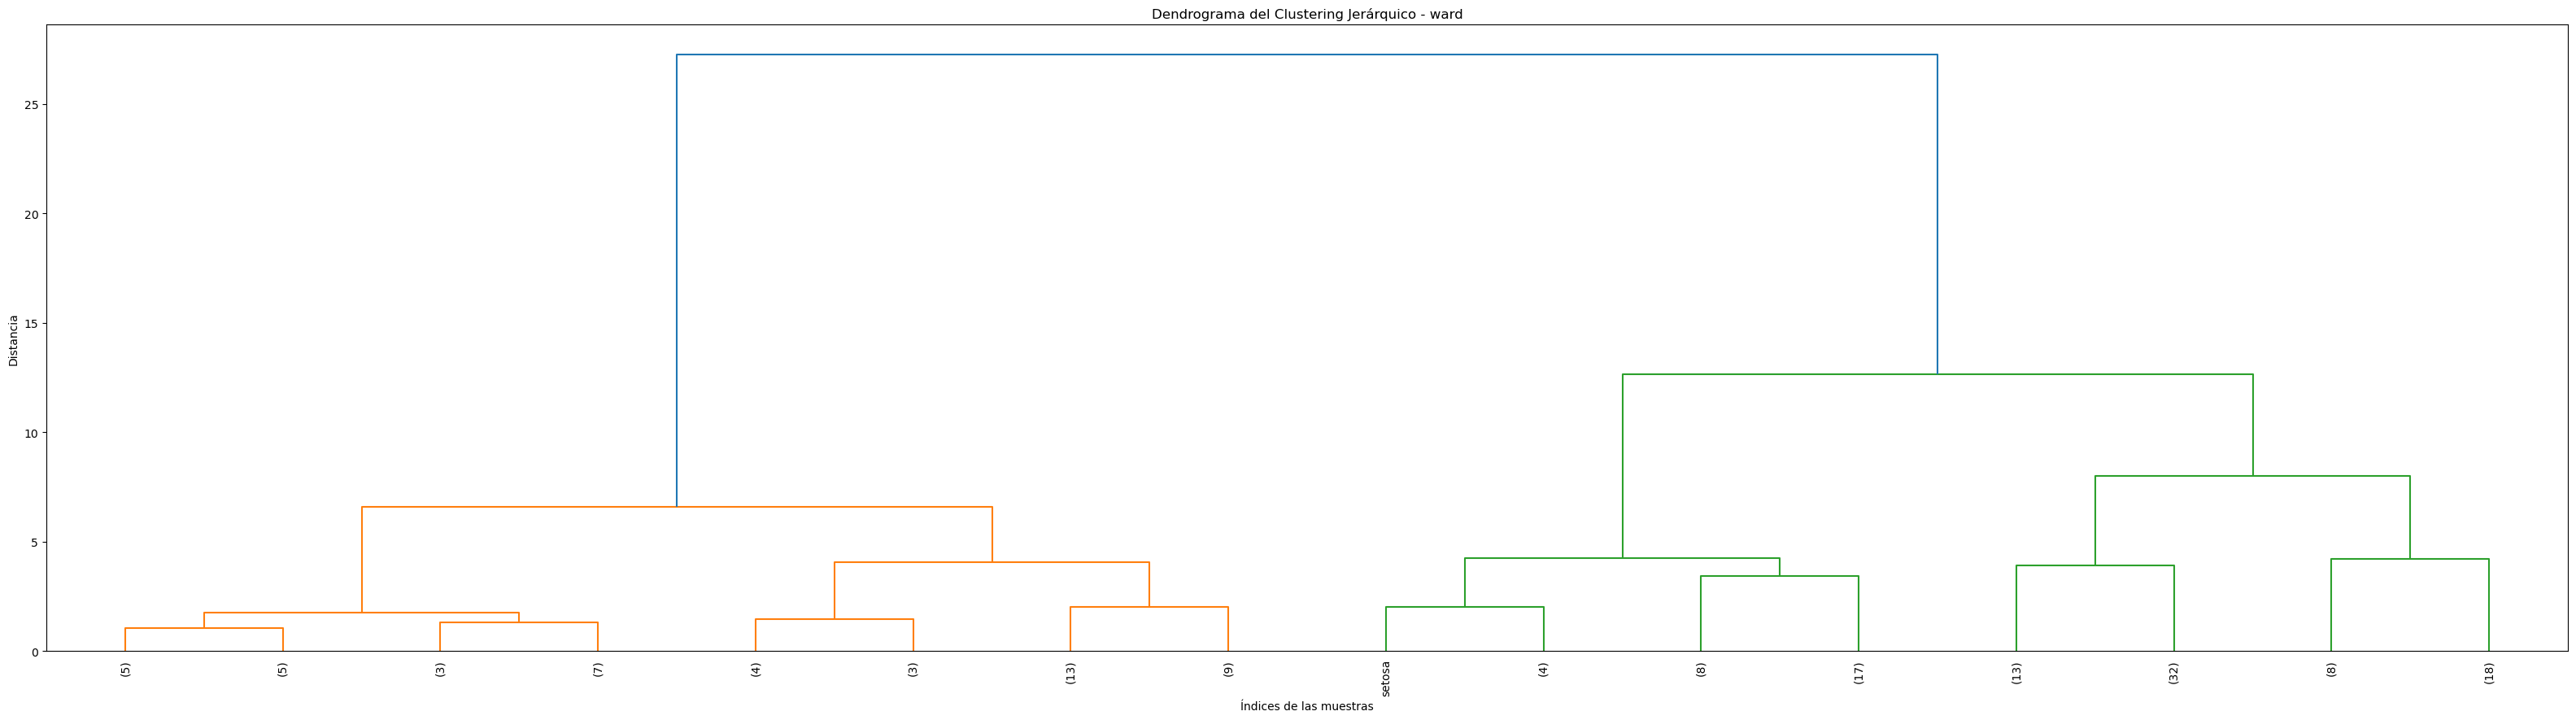

Puntaje de Silhouette: 0.4467

Método de enlace: average


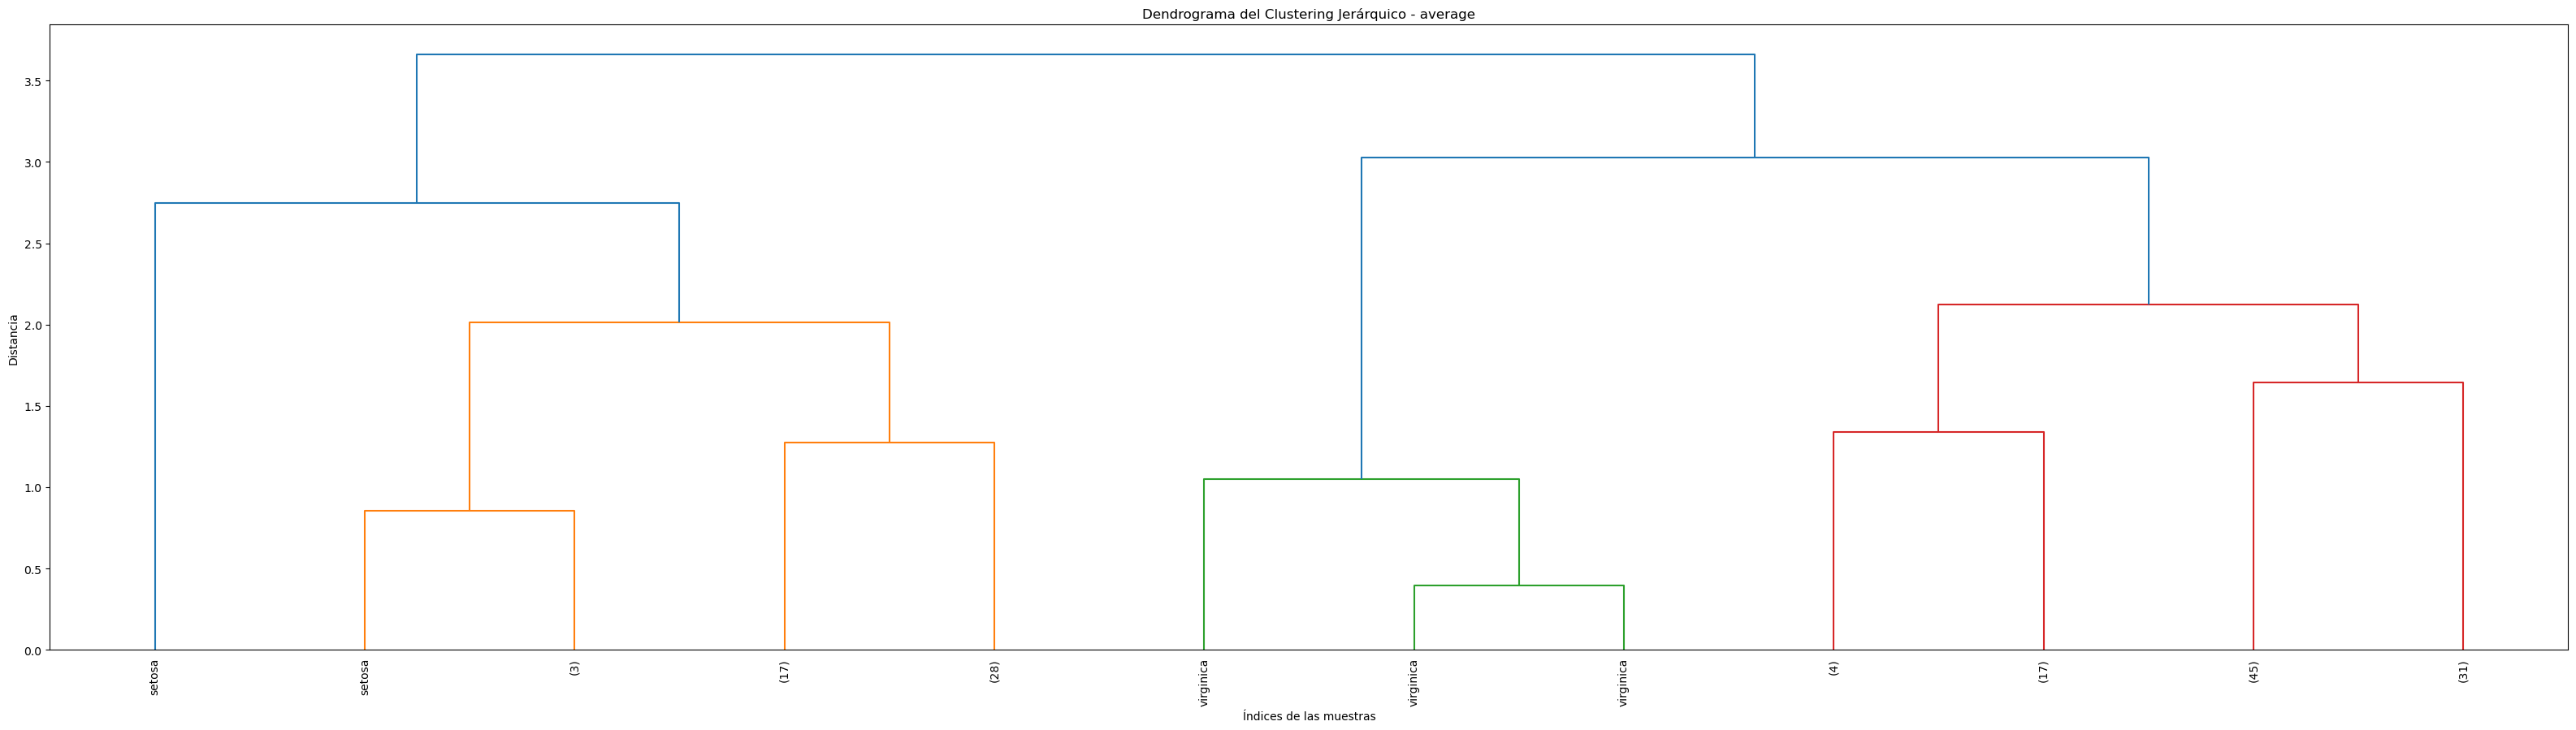

Puntaje de Silhouette: 0.4803

Método de enlace: centroid


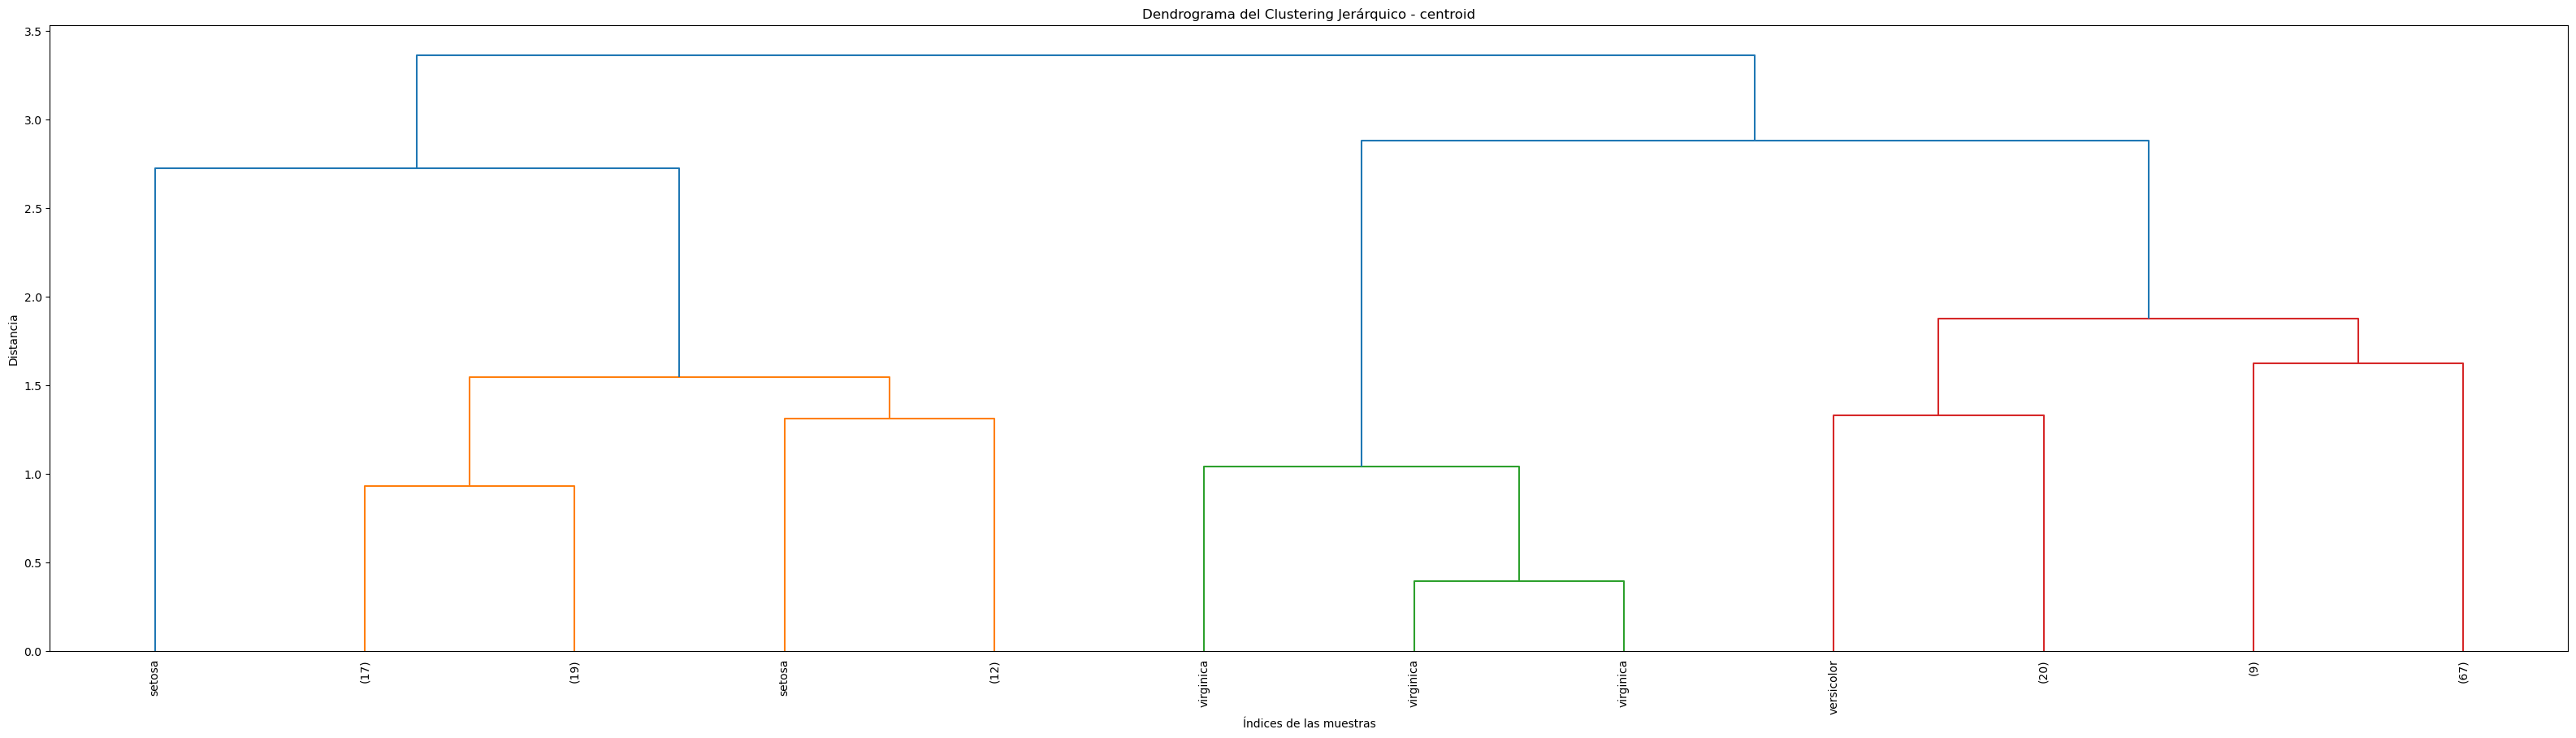

Puntaje de Silhouette: 0.4803


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos Iris

iris = load_iris()
caracteristicas = iris.data  # Características (atributos)
clases = iris.target  # Etiquetas de clase (0: Setosa, 1: Versicolor, 2: Virginica)

# Normalizar los datos para mejorar la precisión del clustering
escalador = StandardScaler()
datos_normalizados = escalador.fit_transform(caracteristicas)

# Definir los métodos de enlace a utilizar
metodos_enlace = ['single', 'complete', 'ward', 'average', 'centroid']

# Aplicar clustering jerárquico para cada método y evaluar con Silhouette
for metodo in metodos_enlace:
    print(f"\nMétodo de enlace: {metodo}")
    
    # Aplicar el clustering jerárquico
    enlaces = linkage(datos_normalizados, method=metodo)
    
    # Visualizar el dendrograma
    plt.figure(figsize=(40, 10))
    plt.title(f"Dendrograma del Clustering Jerárquico - {metodo}")
    
    # En general, el dendograma presenta los indices de los registros. 
    # En esta ocasión los hemos sustituido por el nombre de la clase.
    # Tambien tenemos la posibilidad de limitar la profundidad. En este caso p=3 profundidad 3 niveles
    dendrogram(enlaces, leaf_rotation=90, leaf_font_size=10, labels=iris.target_names[clases],truncate_mode='level', p=3)
    #dendrogram(enlaces, leaf_rotation=90, leaf_font_size=10, labels=iris.target_names[clases],)
    plt.xlabel("Índices de las muestras")
    plt.ylabel("Distancia")
    plt.show()
    
    # Determinar las etiquetas de los clusters para un número de 3 grupos
    etiquetas_clusters = fcluster(enlaces, t=3, criterion='maxclust')
    
    # Calcular la métrica de Silhouette para evaluar la calidad del clustering
    puntaje_silhouette = silhouette_score(datos_normalizados, etiquetas_clusters)
    print(f"Puntaje de Silhouette: {puntaje_silhouette:.4f}")
    
    


Ejercicio: ¿De todos los criterios de enlace, cuál es el que mejor se adapta a este dataset?

Ejercicio: Mdifica la profundidad del dendograma y observa como cambia el nivel de detalle (para hacerlo consulta el código)